# **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


Proyecto seleccionado:
Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Ucamp Ciencias de Datos 2023/Modulo 7/aspirationsGenZ.csv')

In [5]:
# Mostrar las primeras filas del DataFrame
print(df.head())

  Your Current Country.  Your Current Zip Code / Pin Code Your Gender  \
0                 India                            273005        Male   
1                 India                            851129        Male   
2                 India                            123106      Female   
3                 India                            834003        Male   
4                 India                            301019      Female   

  Which of the below factors influence the most about your career aspirations ?  \
0       People who have changed the world for better                              
1       People who have changed the world for better                              
2                         Social Media like LinkedIn                              
3      People from my circle, but not family members                              
4             Influencers who had successful careers                              

  Would you definitely pursue a Higher Education / Post Gradua

In [6]:
df.shape

(235, 15)

In [7]:
#Vamos a revisar si hay datos faltantes en los encuestados
df.isnull().sum()

Your Current Country.                                                                                                       0
Your Current Zip Code / Pin Code                                                                                            0
Your Gender                                                                                                                 0
Which of the below factors influence the most about your career aspirations ?                                               0
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.    0
How likely is that you will work for one employer for 3 years or more ?                                                     0
Would you work for a company whose mission is not clearly defined and publicly posted.                                      0
How likely would you work for a company whose mission is misaligned with their public actions or even their product ? 

Nuestro Interes es comprender el tipo de Interes de los aspirantes de la Generación Z en india, asumiendo el plantamiento que da Kaggle. Por eso exploraremos para comprender mejor la naturaleza de los datos, algunas preguntas que considero relevantes. Bajo esta premisa, no nos interesa las personas fuera de India, así que primero miraremos el porcentaje de personas fuera de India, y saber si podemos eliminar estos registros en caso que el porcentaje no sea significativo y después miraremos algunas variables relevantes

In [8]:
# Filtrar las filas correspondientes a personas que no están en la India
not_in_india = df[df['Your Current Country.'] != 'India']
# Contar el número de personas que no están en la India
num_not_in_india = len(not_in_india)
print (num_not_in_india)

4


In [9]:
# Calcular el porcentaje de personas que no están en la India
total_persons = len(df)  # Total de personas en la muestra
percentage_not_in_india = (num_not_in_india / total_persons) * 100
print(percentage_not_in_india, "%")

1.702127659574468 %


Como vemos el porcentaje es inferior a 2%, y corresponde solo a 4 datos, por lo que los quitaremos de nuestro df

In [10]:
# Eliminar las filas correspondientes a personas que no están en India
df = df[df['Your Current Country.'] == 'India']
df.shape

(231, 15)

In [11]:
#Vamos a analizar: Which of the below factors influence the most about your career aspirations ?
#para comprender qué factores son más importantes para ellos al considerar sus aspiraciones profesionales.
# Ver los valores únicos de la variable
factors_influence = df['Which of the below factors influence the most about your career aspirations ?'].unique()
print("Valores únicos de 'Which of the below factors influence the most about your career aspirations ?':")
print(factors_influence)

Valores únicos de 'Which of the below factors influence the most about your career aspirations ?':
['People who have changed the world for better'
 'Social Media like LinkedIn'
 'People from my circle, but not family members'
 'Influencers who had successful careers' 'My Parents']


In [12]:
# Contar la frecuencia de cada valor
factors_counts = df['Which of the below factors influence the most about your career aspirations ?'].value_counts()
print("\nFrecuencia de cada valor:")
print(factors_counts)


Frecuencia de cada valor:
Which of the below factors influence the most about your career aspirations ?
My Parents                                       78
People who have changed the world for better     56
People from my circle, but not family members    38
Influencers who had successful careers           37
Social Media like LinkedIn                       22
Name: count, dtype: int64


<ipython-input-13-770892dc6fbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Which of the below factors influence the most about your career aspirations ?', data=df, order=factors_counts.index, palette='viridis')


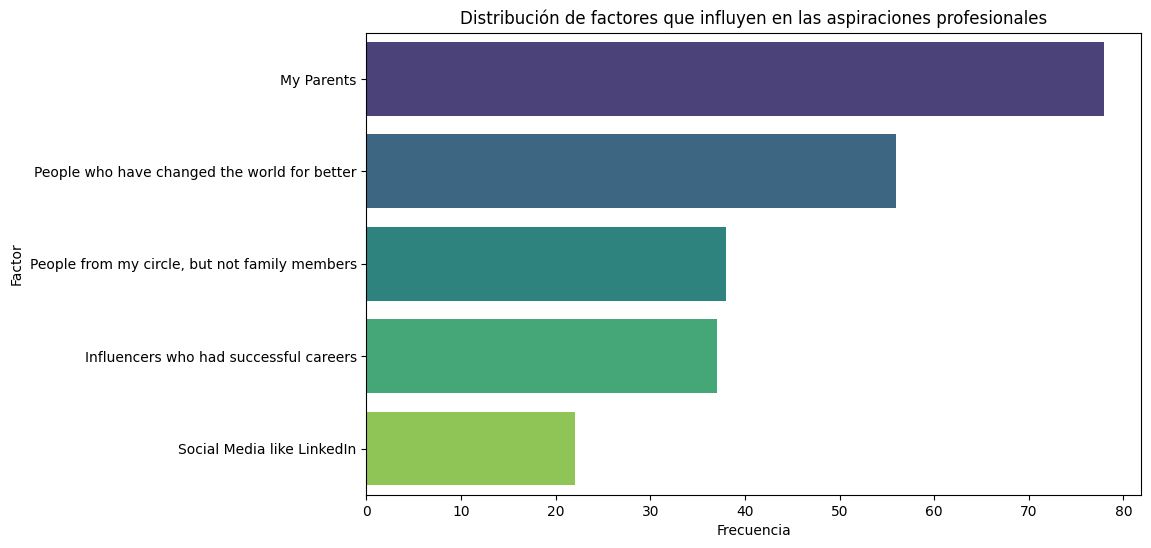

In [13]:
# Graficar la distribución de respuestas
plt.figure(figsize=(10, 6))
sns.countplot(y='Which of the below factors influence the most about your career aspirations ?', data=df, order=factors_counts.index, palette='viridis')
plt.title('Distribución de factores que influyen en las aspiraciones profesionales')
plt.xlabel('Frecuencia')
plt.ylabel('Factor')
plt.show()

In [14]:
#Vamos a analizar: What is the most preferred working environment for you ?
#para entender en qué tipo de entorno de trabajo prefieren trabajar.

# Seleccionar la columna de interés
preferred_environment = df['What is the most preferred working environment for you.'].unique()

print("Valores únicos de 'Which of the below factors influence the most about your career aspirations ?':")
print(preferred_environment)

Valores únicos de 'Which of the below factors influence the most about your career aspirations ?':
['Fully Remote with No option to visit offices'
 'Fully Remote with Options to travel as and when needed'
 'Hybrid Working Environment with less than 15 days a month at office'
 'Every Day Office Environment'
 'Hybrid Working Environment with less than 10 days a month at office'
 'Hybrid Working Environment with less than 3 days a month at office']


In [15]:
# Contar la frecuencia de cada valor
preferred_environment = df['What is the most preferred working environment for you.'].value_counts()
print("\nFrecuencia de cada valor:")
print(preferred_environment)


Frecuencia de cada valor:
What is the most preferred working environment for you.
Fully Remote with Options to travel as and when needed                 59
Hybrid Working Environment with less than 15 days a month at office    54
Every Day Office Environment                                           50
Hybrid Working Environment with less than 10 days a month at office    31
Hybrid Working Environment with less than 3 days a month at office     26
Fully Remote with No option to visit offices                           11
Name: count, dtype: int64


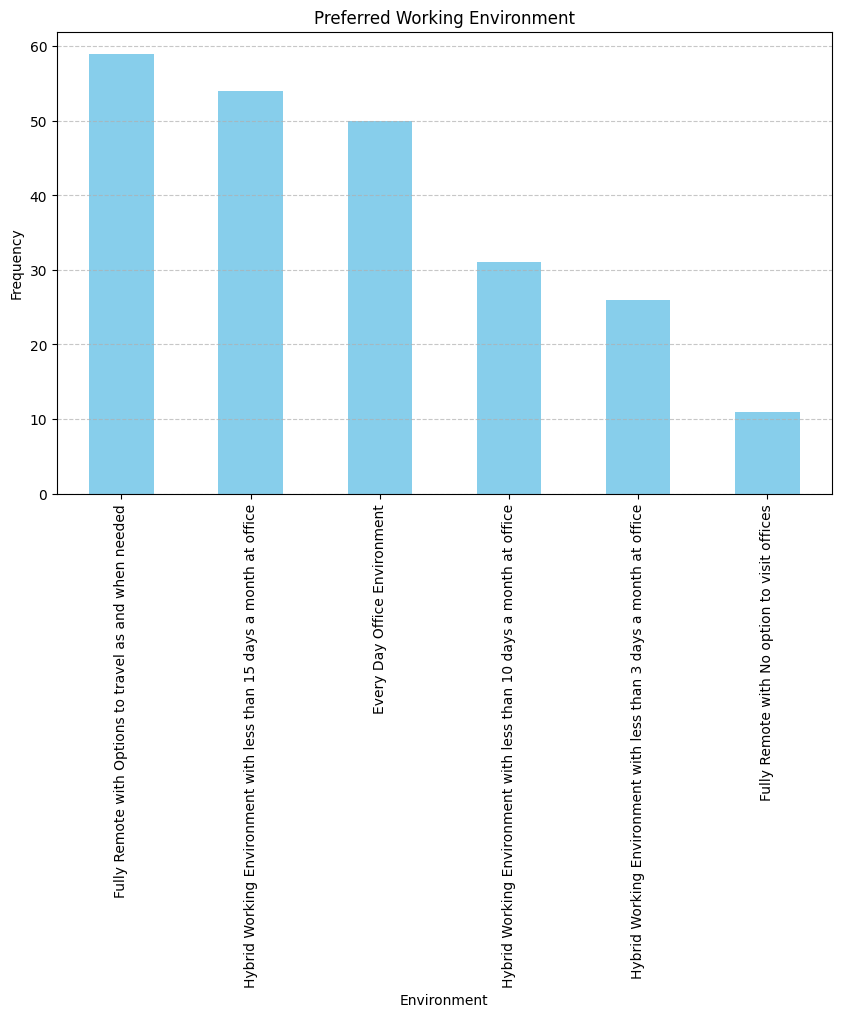

In [16]:
# Graficar con etiquetas giradas
plt.figure(figsize=(10, 6))
preferred_environment.plot(kind='bar', color='skyblue')
plt.title('Preferred Working Environment')
plt.xlabel('Environment')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotar las etiquetas en 90 grados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
#Which of the below Employers would you work with
#para entender en qué tipo de Empleador prefiere la Gen Z.

# Seleccionar la columna de interés
preferred_Employers = df['Which of the below Employers would you work with.'].unique()

print("Valores únicos de 'Which of the below Employers would you work with.':")
print(preferred_Employers)

Valores únicos de 'Which of the below Employers would you work with.':
['Employer who rewards learning and enables that environment'
 'Employer who pushes your limits by enabling an learning environment, and rewards you at the end'
 'Employer who appreciates learning and enables that environment'
 "Employer who pushes your limits and doesn't enables learning environment and never rewards you"
 "Employers who appreciates learning but doesn't enables an learning environment"]


In [18]:
# Contar la frecuencia de cada valor
preferred_Employers = df['Which of the below Employers would you work with.'].value_counts()
print("\nFrecuencia de cada valor:")
print(preferred_Employers)


Frecuencia de cada valor:
Which of the below Employers would you work with.
Employer who pushes your limits by enabling an learning environment, and rewards you at the end    110
Employer who appreciates learning and enables that environment                                      74
Employer who rewards learning and enables that environment                                          36
Employer who pushes your limits and doesn't enables learning environment and never rewards you       7
Employers who appreciates learning but doesn't enables an learning environment                       4
Name: count, dtype: int64


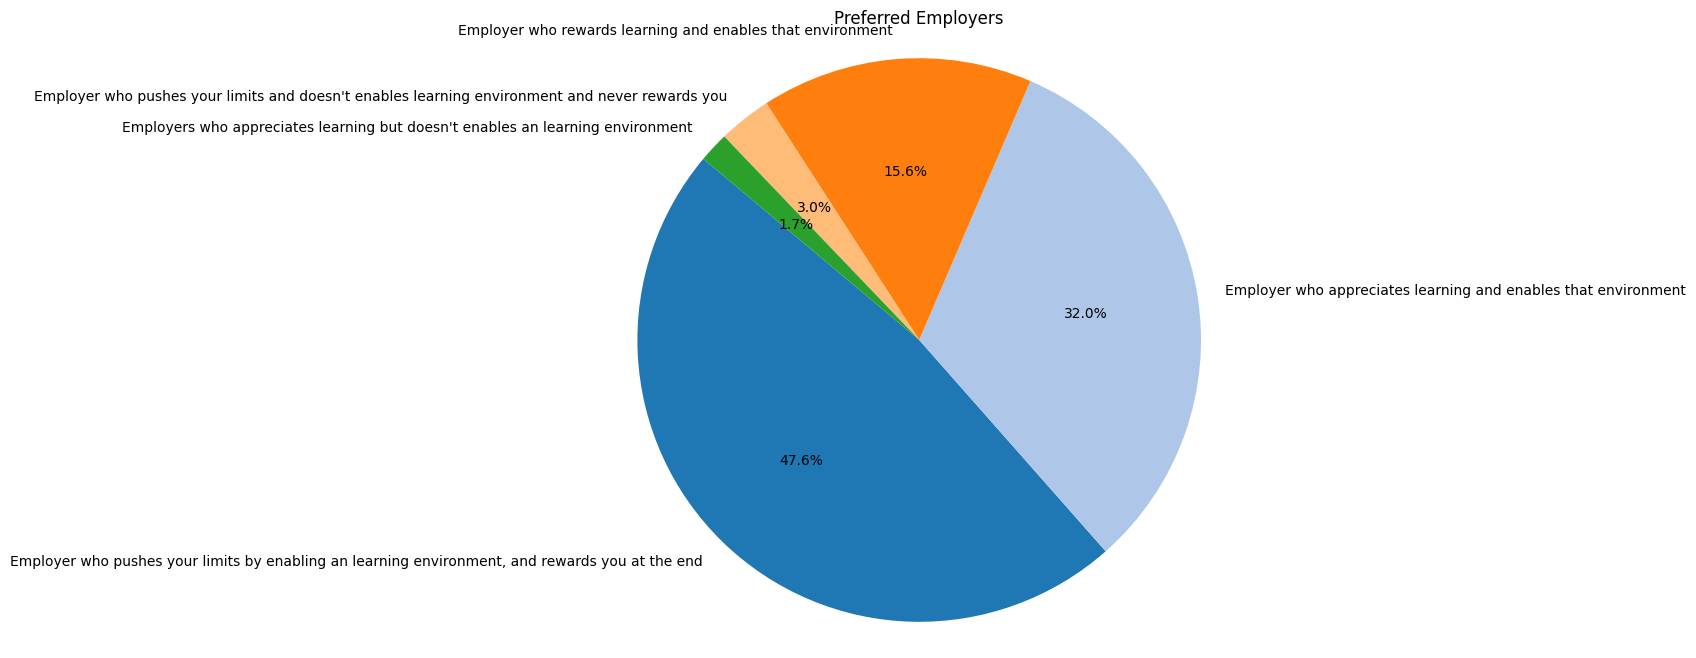

In [20]:
# Definir los datos
labels = preferred_Employers.index
sizes = preferred_Employers.values

# Crear la gráfica de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')
plt.title('Preferred Employers')
plt.show()

In [21]:
#Which of the following setup you would like to work ?
#para entender que tipo de configuración o número de personas se prefiere en grupos de trabajos.

# Seleccionar la columna de interés
preferred_Setup = df['Which of the following setup you would like to work ?'].unique()

print("Valores únicos de 'Which of the following setup you would like to work ?':")
print(preferred_Setup)

Valores únicos de 'Which of the following setup you would like to work ?':
['Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team'
 'Work with 5 to 6 people in my team'
 'Work with 2 to 3 people in my team, Work with 5 to 6 people in my team'
 'Work with 2 to 3 people in my team'
 'Work with 7 to 10 or more people in my team'
 'Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team'
 'Work alone' 'Work with more than 10 people in my team'
 'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team'
 'Work alone, Work with 5 to 6 people in my team'
 'Work alone, Work with 2 to 3 people in my team, Work with 7 to 10 or more people in my team'
 'Work alone, Work with 2 to 3 people in my team'
 'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team'
 'Work al

In [22]:
# Contar la frecuencia de cada valor
preferred_Setup = df['Which of the following setup you would like to work ?'].value_counts()
print("\nFrecuencia de cada valor:")
print(preferred_Setup)


Frecuencia de cada valor:
Which of the following setup you would like to work ?
Work with 5 to 6 people in my team                                                                                                                                           63
Work with 2 to 3 people in my team                                                                                                                                           54
Work with more than 10 people in my team                                                                                                                                     26
Work alone                                                                                                                                                                   16
Work with 7 to 10 or more people in my team                                                                                                                                  15
Work with 2 to 3 people in my team, Wor

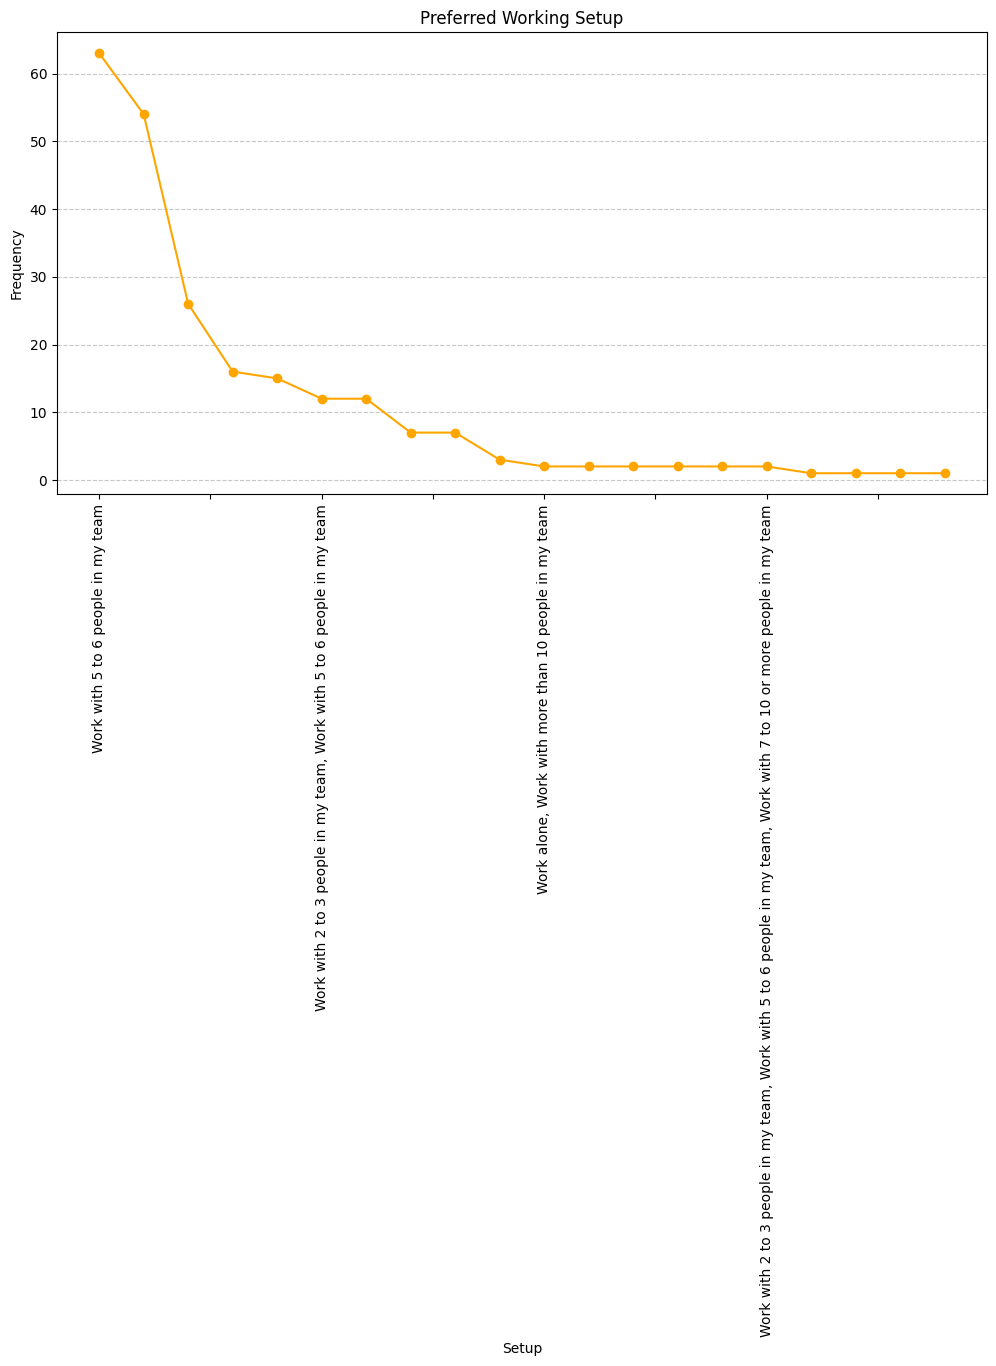

In [23]:
#Grafica de frecuencias de la configuración de los Equipos de Trabajo
plt.figure(figsize=(12, 6))
preferred_Setup.plot(kind='line', marker='o', color='orange')
plt.title('Preferred Working Setup')
plt.xlabel('Setup')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

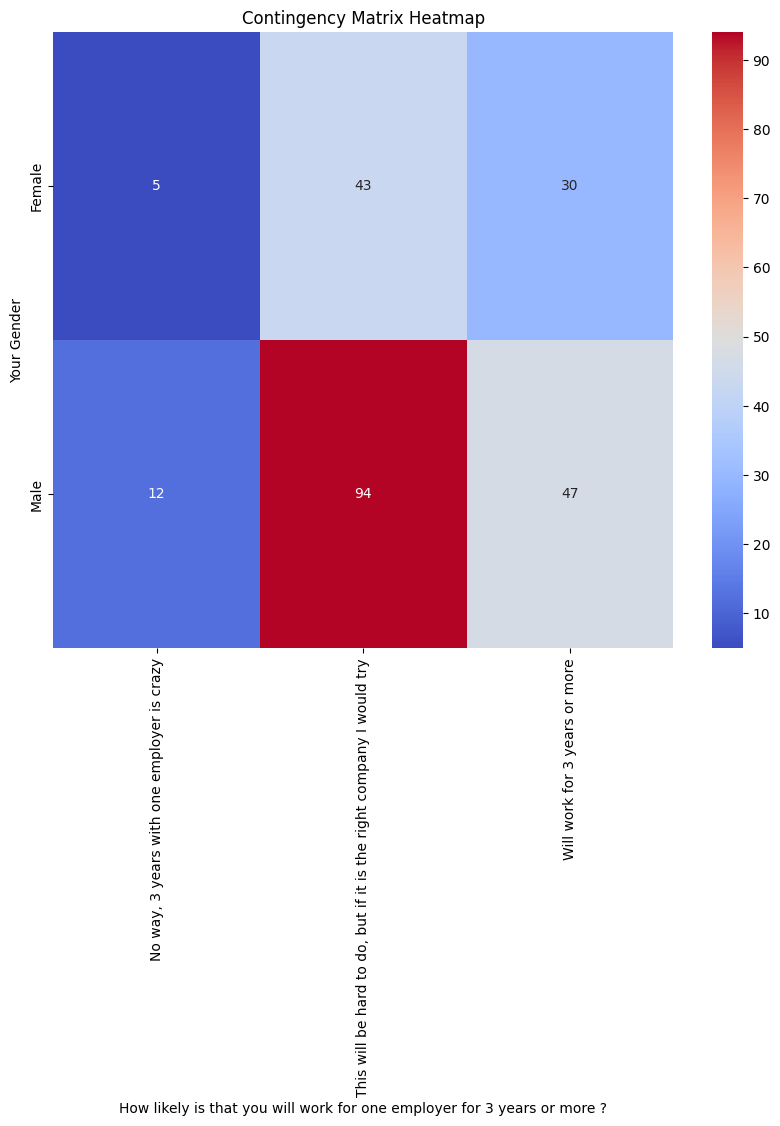

In [24]:
# Seleccionar las columnas Genero y Disposición de trabajar por más de 3 años con un empleador!
categorical_columns = ['Your Gender', 'How likely is that you will work for one employer for 3 years or more ?']

# Calcular la matriz de contingencia
contingency_matrix = pd.crosstab(index=df[categorical_columns[0]], columns=df[categorical_columns[1]])

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Matrix Heatmap')
plt.xlabel(categorical_columns[1])
plt.ylabel(categorical_columns[0])
plt.show()


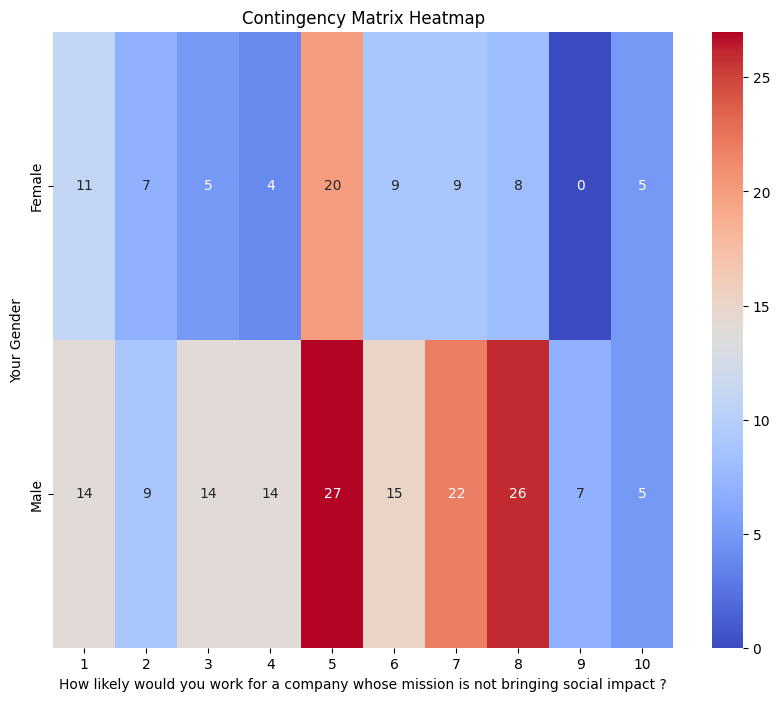

In [25]:
# Comparación Genero contra deseo de trabajar en compañias que no generan impacto social
categorical_columns = ['Your Gender', 'How likely would you work for a company whose mission is not bringing social impact ?']

# Calcular la matriz de contingencia
contingency_matrix = pd.crosstab(index=df[categorical_columns[0]], columns=df[categorical_columns[1]])

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Matrix Heatmap')
plt.xlabel(categorical_columns[1])
plt.ylabel(categorical_columns[0])
plt.show()

Con el análisis exploratorio de las variables que hemos graficado, he llegado a la conclusión Que para un Empleador en la India, que quiera mejorar tanto su retención de empleados de la Gen Z, como las condiciones para un mejor trabajo de sus empleados, le será conveniente ver la agrupación en Clustering de empleados con caracteristicas similares. Esto permitiría comprender mejor las necesidades y preferencias de los empleados Gen Z, así como personalizar estrategias de gestión de recursos humanos y políticas organizativas para satisfacerlas de manera más efectiva.

In [26]:
#Limpiaremos nuestro df para dejar solo las variables que realmente necesitamos para neustro modelo de Clustering
# Paso 1: Eliminación de columnas irrelevantes (También quitaremos el País, ya que está claro que todos son de India en este momento, y para ser implementado por un empleador de India en su empresa)
columns_to_drop = ['Your Current Country.', 'Your Current Zip Code / Pin Code','Would you work for a company whose mission is not clearly defined and publicly posted.', 'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?', 'Which of the below careers looks close to your Aspirational job ?']
cleaned_df = df.drop(columns=columns_to_drop)

# Paso 2: Ya en el proceso exploratior miramos verificamos datos nulos y no hay problemas con ello; así ahora rectificaremos que nuestro df tenga las variables que realmente necesitamos.
cleaned_df.head()

,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...","Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...","Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


In [27]:
#Ahora vamos a codificar numéricamente todas nuestras variables categoricas para poder usarlas en nuestro modelo
cleaned_df['Your Gender'] = cleaned_df['Your Gender'].map({'Male': 0, 'Female': 1})

In [28]:
#Usare Label Encoding para 'How likely is that you will work for one employer for 3 years or more ?' y para 'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.' que tiene 3 posibles respuestas, con un orden inherente.
#También usaré Label Encoding para la variable 'What type of Manager would you work without looking into your watch ?' que muestra un orden aparente con 5 posibilidades de Muy bueno a Malo
#Para las demás usare One-Hot Encoding (Reconociendo que generará una gran cantidad de nuevas variables, pero es la mejor opción por la naturaleza de las variables actuales)

from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()
variables_con_orden = ['How likely is that you will work for one employer for 3 years or more ?', 'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.', 'What type of Manager would you work without looking into your watch ?', 'Which of the below factors influence the most about your career aspirations ?', 'What is the most preferred working environment for you.', 'Which of the below Employers would you work with.', 'Which type of learning environment that you are most likely to work in ?', 'Which of the following setup you would like to work ?']
cleaned_df[variables_con_orden] = cleaned_df[variables_con_orden].apply(label_encoder.fit_transform)

In [30]:
cleaned_df.head()

,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,0,3,2,1,4,1,3,1,1,4
1,0,3,1,1,1,2,2,3,1,13
2,1,4,2,2,7,4,2,5,1,9
3,0,2,1,1,6,4,2,1,1,8
4,1,0,1,2,5,2,0,4,1,9


In [31]:
cleaned_df.shape

(231, 10)

In [32]:
nan_counts = cleaned_df.isnull().sum()
print("Número de valores NaN por variable:")
print(nan_counts)

Número de valores NaN por variable:
Your Gender                                                                                                                 0
Which of the below factors influence the most about your career aspirations ?                                               0
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.    0
How likely is that you will work for one employer for 3 years or more ?                                                     0
How likely would you work for a company whose mission is not bringing social impact ?                                       0
What is the most preferred working environment for you.                                                                     0
Which of the below Employers would you work with.                                                                           0
Which type of learning environment that you are most likely to work in ?          

Ahora vamos a proseguir y ya que nuestro DF está codificado, veremos la relación entre las variables con una matriz de correlación y de acuerdo a esto miraremos el modelo más adecuado para nuestro caso e implementarlo

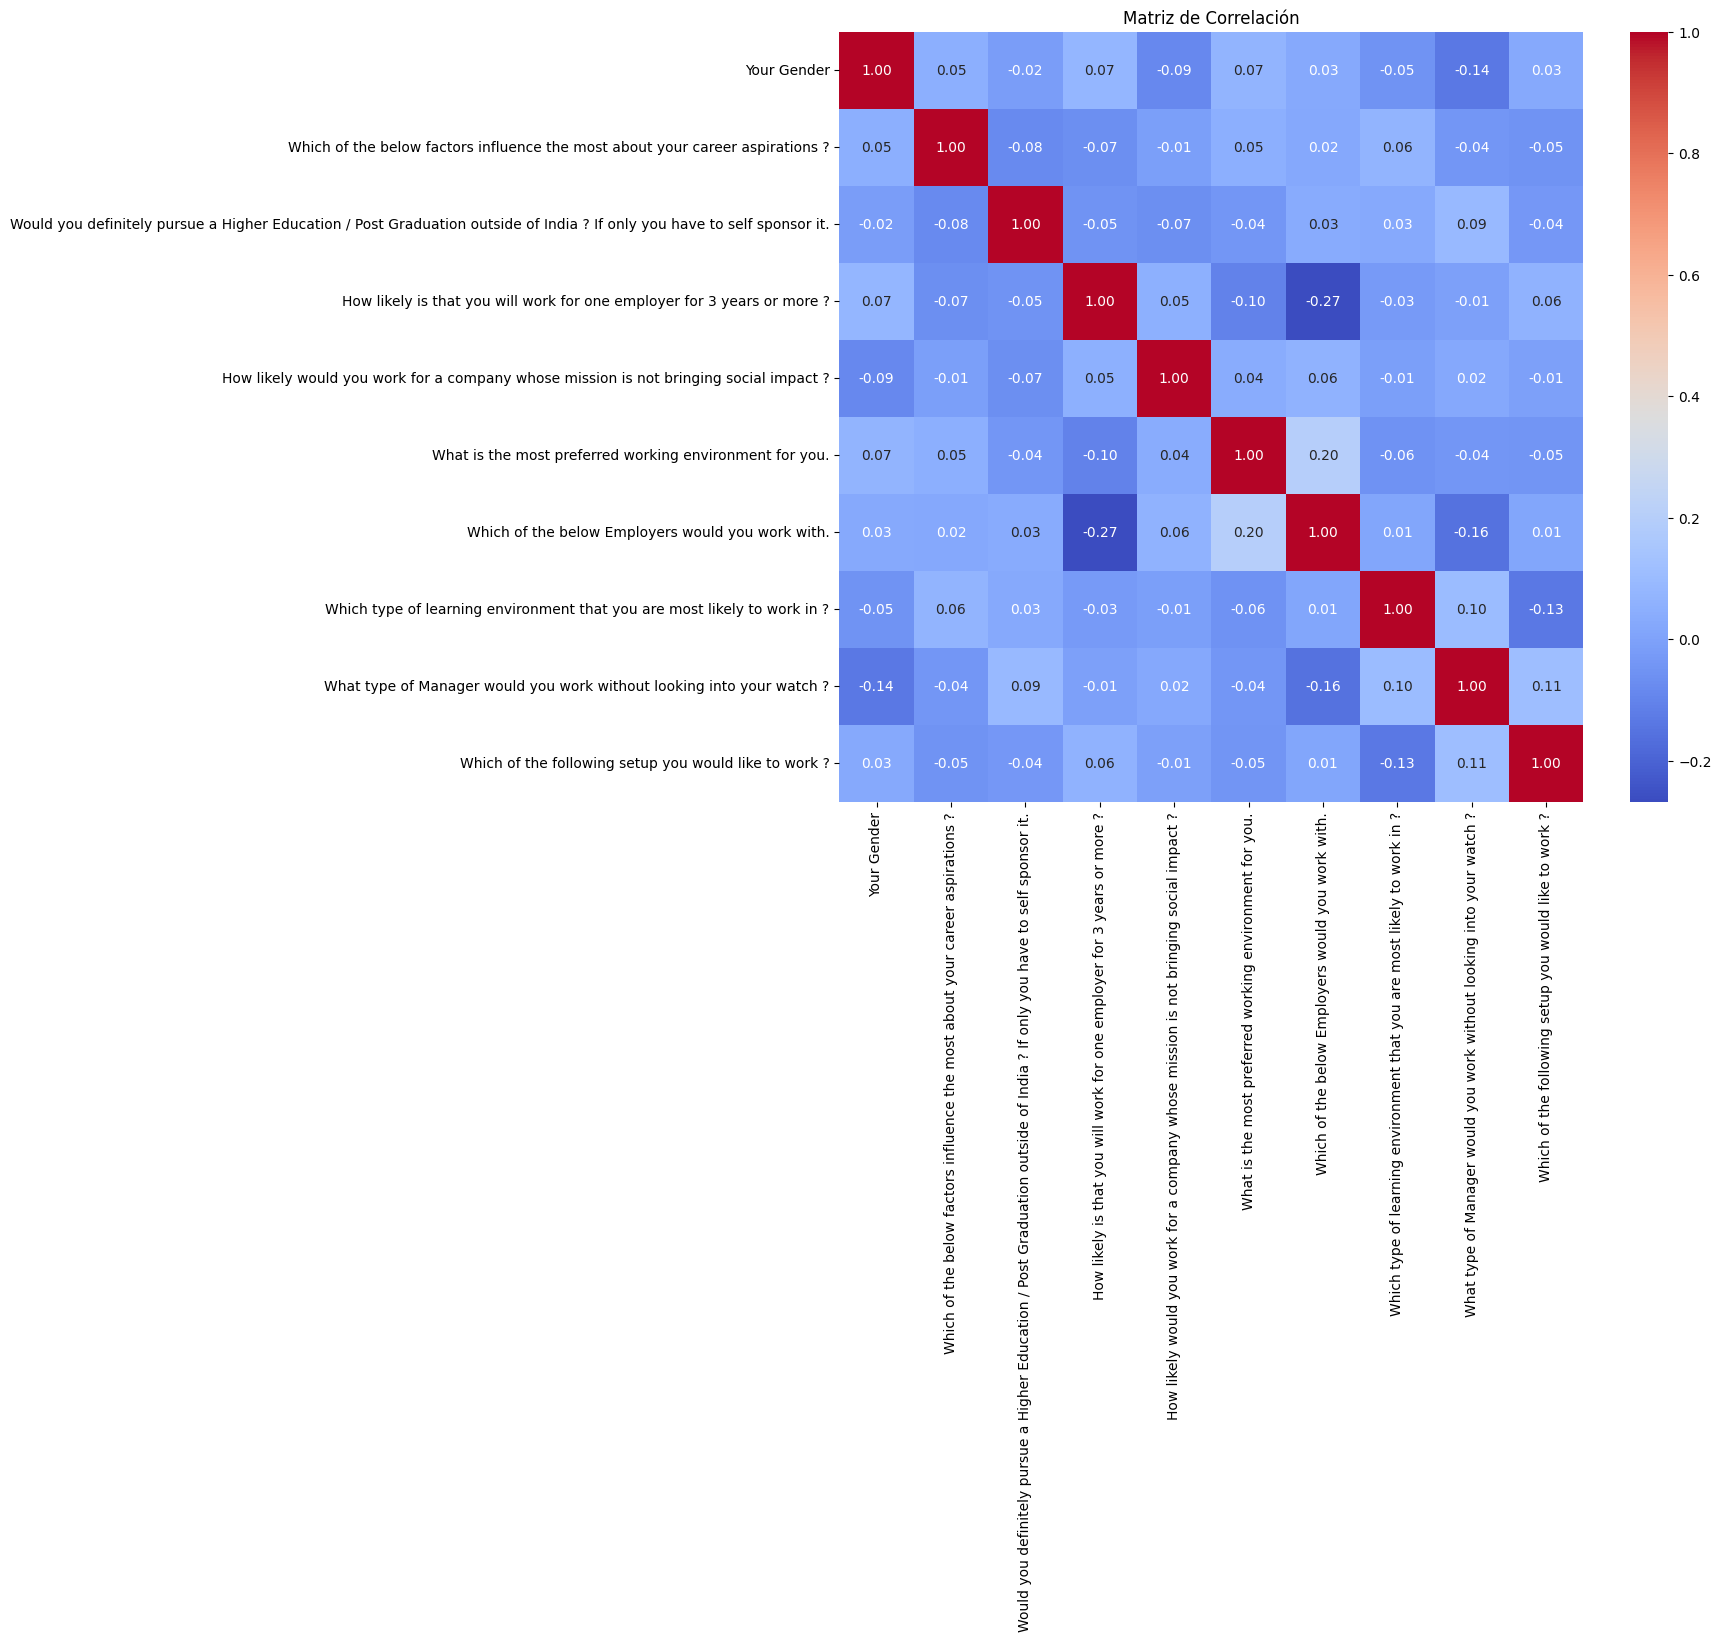

In [33]:
# Calcular la matriz de correlación
correlation_matrix = cleaned_df.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación nos muestra que las variables realmente son muy independientes la una de la otra, aunque en su mayoría los valores se encuentran en termino medio. A partir de esto, concluyo que ni un modelo de cluster, ni de ML Supervisado sería lo más adecuado. Quizá necesitemos más datos de los que tenemos y por tanto los modelos serán insuficientes. Entonces prosigo a hacer una red Neuronal, y examinar con más preseción la naturaleza de los datos.

In [34]:
#creamos una copia por seguridad de nuestro Dataframe, para usar con el entrenamiento del modelo
datos = cleaned_df.copy()

In [35]:
#Para implementar nuestra red neuronal, necesitamos dividir nuestros datos en conjunto de entrenamiento y prueba
#importamos la función train_test_split de la libreria de sklearn
from sklearn.model_selection import train_test_split

En la poca correlación que vi entre las variables y la funcionalidad que podría ser de interés para empresarios de la India, he decidido indicar la variable objetivo Y, a 'How likely is that you will work for one employer for 3 years or more ?', para observar si un candidato a báse de las preguntas en la encuesta fuera probable que acepte trabajar por más de 3 años, lo cual implica estabilidad para la empresa.

In [36]:
#Asignamos a X nuestras variables independientes de acuerdo al analisis que hemos desarrollado
X = datos.drop('How likely is that you will work for one employer for 3 years or more ?', axis=1)
y = datos['How likely is that you will work for one employer for 3 years or more ?']

In [37]:
# Dividimos los datos en conjuntos de entrenamiento y prueba (Nuestro caso, tenemos muy pocos datos, entonces, 85% para entrenamiento y 15% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)


In [38]:
# Imprimimos las formas (shapes) de los conjuntos de entrenamiento y prueba para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (196, 9)
Forma de X_test: (35, 9)
Forma de y_train: (196,)
Forma de y_test: (35,)


In [39]:
#Continuamos con nuestro modelo, y vamos a implementar Modelos de Desición, dado que tenemos pocos datos y puede darnos una buena presición
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
modelo_arbol = DecisionTreeClassifier(random_state=40)

In [41]:
#Procedemos a entrenar nuestro modelo con los datos previamente entrenados
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [42]:
#Realizaremos la predicción del modelo y posterior evaluación del rendimiento del modelo
predicciones = modelo_arbol.predict(X_test)

In [43]:
exactitud = accuracy_score(y_test, predicciones)
print("Exactitud del modelo:", exactitud)

print("\nReporte de clasificación:")
print(classification_report(y_test, predicciones))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, predicciones))

Exactitud del modelo: 0.6

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.77      0.68      0.72        25
           2       0.33      0.50      0.40         8

    accuracy                           0.60        35
   macro avg       0.37      0.39      0.37        35
weighted avg       0.63      0.60      0.61        35


Matriz de confusión:
[[ 0  1  1]
 [ 1 17  7]
 [ 0  4  4]]


En nuestro caso, la presición solo es correcta o confiable cuando para (1) 'This will be hard to do, but if it is the right I would try'. Los otros valores no son precisos. Lo mismo con recall, f1-score y support!
Nuestro modelo tiene problemas para clasificar tanto la opción (0) y la (2)
En cuanto a accuracy, nos indica que la exactitud es del 60%, lo que significa que el 60% de todas las instancias en el conjunto de prueba fueron clasificadas correctamente.

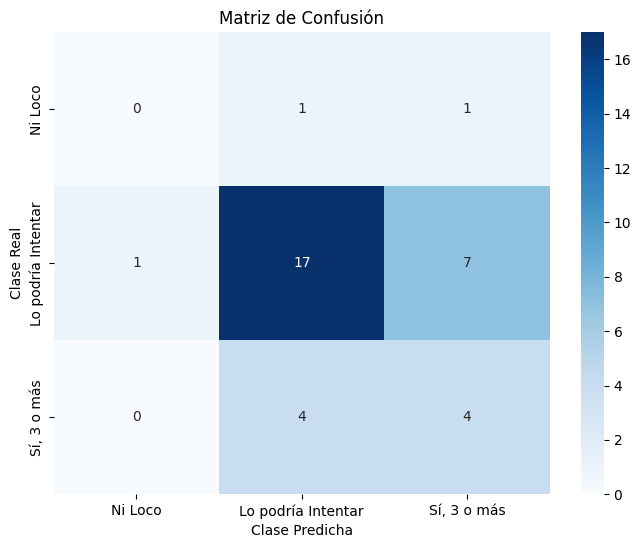

In [44]:
clases = ['Ni Loco', 'Lo podría Intentar', 'Sí, 3 o más']
matriz_confusion = confusion_matrix(y_test, predicciones)
# Crear mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

In [45]:
#Vamos hacer unos cambios para tratar de ajustar la precisión del modelo, cambiando hiperparametros y volviendo a entrenar nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (200, 9)
Forma de X_test: (31, 9)
Forma de y_train: (200,)
Forma de y_test: (31,)


In [46]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)

In [47]:
#Procedemos a entrenar nuestro modelo con los nuevos hiper parametros
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [48]:
#Realizaremos la predicción del modelo y posterior evaluación del rendimiento del modelo
predicciones = modelo_arbol.predict(X_test)

In [49]:
exactitud = accuracy_score(y_test, predicciones)
print("Exactitud del modelo:", exactitud)

print("\nReporte de clasificación:")
print(classification_report(y_test, predicciones))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, predicciones))

Exactitud del modelo: 0.7096774193548387

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.77      0.87      0.82        23
           2       0.50      0.29      0.36         7

    accuracy                           0.71        31
   macro avg       0.42      0.39      0.39        31
weighted avg       0.68      0.71      0.69        31


Matriz de confusión:
[[ 0  1  0]
 [ 1 20  2]
 [ 0  5  2]]


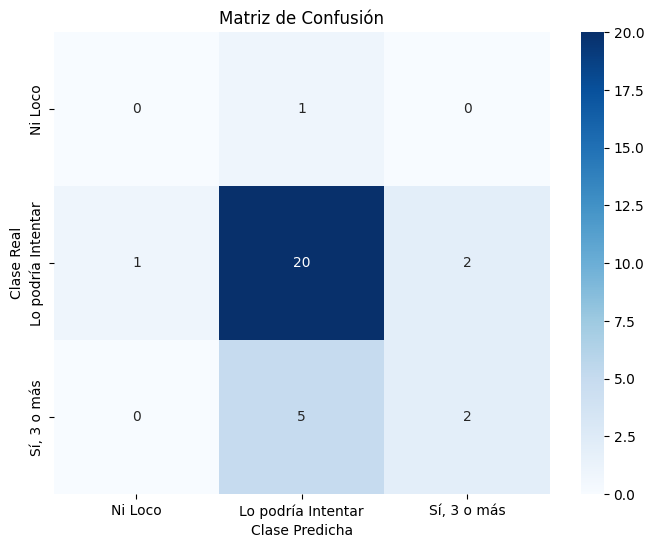

In [50]:
matriz_confusion = confusion_matrix(y_test, predicciones)
# Crear mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

Bajo este modelo obtuvimos mejor resultados. Aun así, no es muy exacto, y tiene dificultades con examinar los valores (0) y (2).
Parte de la dificultad está en la falta de datos para un mejor entrenamiento.
Ahora veremos cuales en medio de las deficiencias del modelo, nos muestra son las variables más importantes que ayudan a predecir si alguien de la Generación Z permanecerá 3 años o más en un empleo

In [51]:
#Ahora usaremos feature_importances, para obtener la importancia de cada característica. Esto te proporcionará una medida de cuánto contribuye cada característica a las decisiones de clasificación del árbol.
importantes_variables = modelo_arbol.feature_importances_

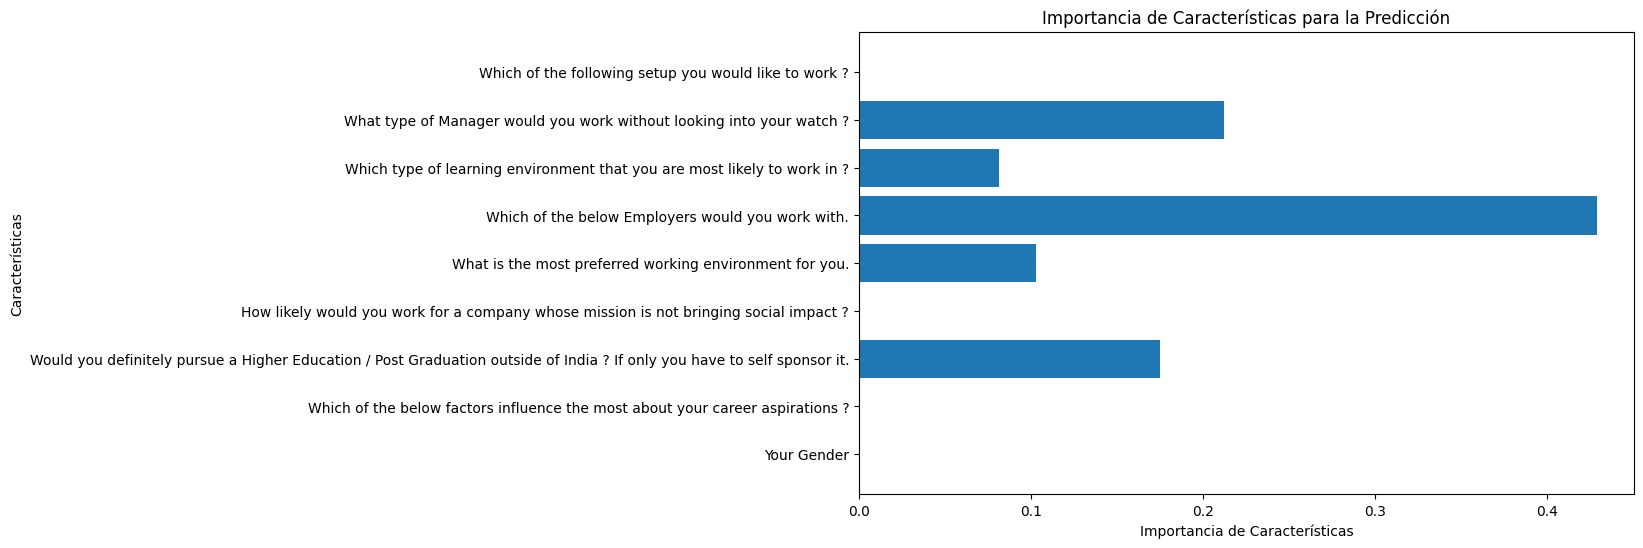

In [52]:
nombres_variables = list(X.columns)

# Crear gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(importantes_variables)), importantes_variables, align='center')
plt.yticks(np.arange(len(nombres_variables)), nombres_variables)
plt.xlabel('Importancia de Características')
plt.ylabel('Características')
plt.title('Importancia de Características para la Predicción')
plt.show()

De la implementación de este modelo, podemos concluir que la variable que más influye es **Which of the below Employers would you work with.** Seguidas de **What type of Manager would you work without looking into your watch ?** y **Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.** Lo cual pude dar luz de aquellas cosas que una empresa o empleador de la India debe considerar tanto para contratar a un mimbro de la Generación Z, como para retener su mano de obra en un ambiente laboral adecuado y ameno a las espectativas de los mismos.

In [53]:
from flask import Flask, request, jsonify
import joblib

In [54]:
app = Flask("__main__")

In [55]:
#Primero guardaremos nuestro modelo en extensión pkl para poder usar con flask
joblib.dump(modelo_arbol, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [56]:
#Ahora cargaremos nuestro modelo pkl
modelo = joblib.load('modelo_entrenado.pkl')

In [57]:
#Antes de continuar necesitamos la URL de nuestro servidor relativo Flask, ya que estmaos trabajando en un entorno No local
#Para esto usaremos pyngrok
!pip install pyngrok

In [58]:
from pyngrok import ngrok

In [59]:
ngrok.set_auth_token("2gcbV1GbJsqy3ZROs1elUCOLW6C_6QBkbRwSaFKJ9JDEnPHvp")

In [60]:
public_url = ngrok.connect(addr='127.0.0.1:5000', proto='http')
print('URL de la aplicación:', public_url)

URL de la aplicación: NgrokTunnel: "https://3546-34-125-236-104.ngrok-free.app" -> "http://127.0.0.1:5000"


COn la ejecución de las lineas anteriores ya hemos optenido nuestra URL publica para poder probar nuestra API Flask

In [61]:
#Ahora necesitamos instalar la Biblioteca para atender solicitudes HTTP
!pip install requests

In [62]:
import requests

In [63]:
#Realizaremos Una prueba con datos de prueba que serán las preguntas y respuestas de la encuesta para un usuario X
#Solo usaremos las preguntas relevantes que obtuvimos después de ejecutar nuestro modelo anteriormente
datos_de_prueba = {
    "What type of Manager would you work without looking into your watch ?": 1, #Manager who explains what is expected, sets a goal and helps achieve it
    "Which type of learning environment that you are most likely to work in ?": 1, #Instructor or Expert Learning Programs, Trial and error by doing side projects within the company
    "Which of the below Employers would you work with.": 2,#Employer who pushes your limits by enabling an learning environment, and rewards you at the end
    "What is the most preferred working environment for you.": 5, #Hybrid Working Environment with less than 3 days a month at office
    "Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.": 1 #No, But if someone could bare the cost I will

}

Ahora haremos la solicutd POST a la API Flask con los datos de prueba. El objetivo, examinar la respuesta de la API Flask para ver si la predicción se realizó correctamente y si los resultados son coherentes. (Aunque recordemos que nuestro modelo no es el más optimo y fue entrenado con pocos datos)

In [64]:
#Finalmente haremos la prueba mandando la solicitud a nuestra API Flask en la URL Publica donde la estamos ejecutando
# URL de nuestra API Flask
url_api = "https://3546-34-125-236-104.ngrok-free.app"

# Enviar la solicitud POST a la API Flask
respuesta = requests.post(url_api, json=datos_de_prueba)

Lastimosamente aunque hicismos correctamente toda la implementación, no ubo una respuesta correcta con la URL publica con ngrok. Si desplegaramos la API en un servidor pago, omitiriamos este error. Ahora solo nos queda subir este proyecto a un repositorio en Git-Hub y crear el README correspondiente, lo cual haremos en otra isntancia, y esta queda guardada para subir!